In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train.shape

(159571, 8)

In [6]:

print(train[train['toxic']==1].shape[0])
print(train[train['severe_toxic']==1].shape[0])
print(train[train['obscene']==1].shape[0])
print(train[train['threat']==1].shape[0])
print(train[train['insult']==1].shape[0])
print(train[train['identity_hate']==1].shape[0])

15294
1595
8449
478
7877
1405


In [7]:
train['toxic'].unique()

array([0, 1])

In [8]:
train['Noclass']=train.loc[:,'toxic': 'identity_hate'].sum(axis=1)

In [9]:
train.loc[train['Noclass']==0,'No']=1
train.loc[train['Noclass']!=0,'No']=0

In [10]:
del train['Noclass']

In [11]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,No
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1.0


In [12]:
print(train[train['No']==1].shape[0])

143346


In [13]:
train['No'].sum()

143346.0

In [60]:
train.shape

(159571, 9)

In [14]:
train['toxic'].sum()

15294

In [15]:
col=['toxic','severe_toxic','obscene','threat','insult','identity_hate','No']

In [22]:
dfcount=train.groupby(col).size().reset_index()

In [24]:
dfcount.rename(columns={0:'count'},inplace=True)

In [27]:
dfcount=dfcount.sort_values(['count'],ascending=False)

In [29]:
dfcount.reset_index(drop=True)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,No,count
0,0,0,0,0,0,0,1.0,143346
1,1,0,0,0,0,0,0.0,5666
2,1,0,1,0,1,0,0.0,3800
3,1,0,1,0,0,0,0.0,1758
4,1,0,0,0,1,0,0.0,1215
5,1,1,1,0,1,0,0.0,989
6,1,0,1,0,1,1,0.0,618
7,0,0,1,0,0,0,0.0,317
8,0,0,0,0,1,0,0.0,301
9,1,1,1,0,1,1,0.0,265


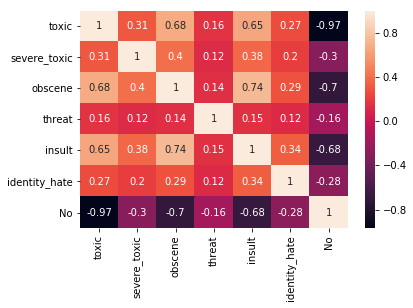

In [36]:
sns.heatmap(train[col].corr(),annot=True)

In [43]:
subset=dfcount[['toxic','obscene','insult','count']]


tox=subset.loc[((subset['toxic']==1)&(subset['obscene']==0)&(subset['insult']==0)),'count'].sum()
obs=subset.loc[((subset['toxic']==0)&(subset['obscene']==1)&(subset['insult']==0)),'count'].sum()

ins=subset.loc[((subset['toxic']==0)&(subset['obscene']==0)&(subset['insult']==1)),'count'].sum()

tox_obs=subset.loc[((subset['toxic']==1)&(subset['obscene']==1)&(subset['insult']==0)),'count'].sum()
obs_ins=subset.loc[((subset['toxic']==0)&(subset['obscene']==1)&(subset['insult']==1)),'count'].sum()
tox_ins=subset.loc[((subset['toxic']==1)&(subset['obscene']==0)&(subset['insult']==1)),'count'].sum()
allthree=subset.loc[((subset['toxic']==1)&(subset['obscene']==1)&(subset['insult']==1)),'count'].sum()



In [44]:
import matplotlib.pyplot as plt

In [46]:
matplotlib inline

In [57]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

ModuleNotFoundError: No module named 'matplotlib_venn'

In [49]:
venn3()

NameError: name 'venn3' is not defined

In [59]:
dfcount[dfcount['severe_toxic']==1]

,toxic,severe_toxic,obscene,threat,insult,identity_hate,No,count
36,1,1,1,0,1,0,0.0,989
37,1,1,1,0,1,1,0.0,265
34,1,1,1,0,0,0,0.0,158
39,1,1,1,1,1,0,0.0,64
27,1,1,0,0,0,0,0.0,41
40,1,1,1,1,1,1,0.0,31
29,1,1,0,0,1,0,0.0,14
31,1,1,0,1,0,0,0.0,11
30,1,1,0,0,1,1,0.0,7
35,1,1,1,0,0,1,0.0,6
